### Sales Analysis
##### Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#### Task.1. Merging the 12 months of sales data into a single csv file

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir("./Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(r"./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

#### Read in updated data

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
all_data.shape

(186850, 6)

In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


#### Clean up Data

#### Drop na rows

In [6]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how="all")

In [8]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [9]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [10]:
all_data = all_data[ ~ (all_data["Order Date"].str[0:2]=="Or") ]

#### Fixing data types

In [11]:
#Quantity Ordered and Price Each
all_data["Quantity Ordered"]= pd.to_numeric(all_data["Quantity Ordered"]) #make int
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"]) #make float
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

#### Augment the data with additional columns

#### Task.2. Add the Month column

In [12]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [13]:
all_data["Month"] = all_data["Order Date"].str[0:2]
#all_data["Month"] = all_data["Month"].astype("int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [14]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
dtype: object

#### Task.3. Add a Sales Column

In [15]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


#### Question.1. What was the best month for sales? How much was earned that month?

In [16]:
results = all_data.groupby(["Month"], as_index=False).sum()
results

,Month,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,01,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.38,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",1822256.73
1,02,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,2188884.72,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",2202022.42
2,03,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.83,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",2807100.38
3,04,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,20558,3367671.02,04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",3390670.24
4,05,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,3135125.13,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",3152606.75
5,06,2099212099222099232099242099252099262099272099...,USB-C Charging CableMacbook Pro LaptopThinkPad...,15253,2562025.61,06/23/19 19:3406/30/19 10:0506/24/19 20:1806/0...,"950 Walnut St, Portland, ME 0410180 4th St, Sa...",2577802.26
6,07,2229102229112229122229132229142229152229162229...,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072,2632539.56,07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",2647775.76
7,08,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,2230345.42,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",2244467.88
8,09,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,13109,2084992.09,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...",2097560.13
9,10,2593582593592593602593612593622593632593642593...,34in Ultrawide Monitor27in 4K Gaming MonitorAA...,22703,3715554.83,10/28/19 10:5610/28/19 17:2610/24/19 17:2010/1...,"609 Cherry St, Dallas, TX 75001225 5th St, Los...",3736726.88


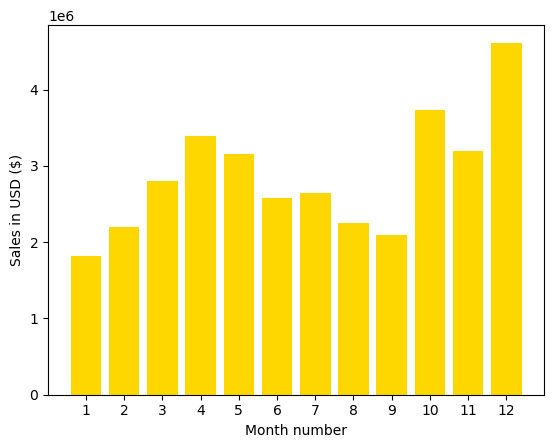

In [17]:
#ploting bar plot

months = range(1, 13)
plt.bar(months, results["Sales"], color="gold")
plt.xticks(months)
plt.xlabel("Month number")
plt.ylabel("Sales in USD ($)")

plt.show()

#### Extracting City from Purchase Address

In [18]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


In [19]:
#extracting city from "Purchase Address"
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)


#### Question.2. What city has the highest number of sales?

In [20]:
# Grouping the data by "City" and summing the numerical columns
results = all_data.groupby(["City"]).sum()["Sales"]
results

City
 Atlanta (GA)          2795498.58
 Austin (TX)           1819581.75
 Boston (MA)           3661642.01
 Dallas (TX)           2767975.40
 Los Angeles (CA)      5452570.80
 New York City (NY)    4664317.43
 Portland (ME)          449758.27
 Portland (OR)         1870732.34
 San Francisco (CA)    8262203.91
 Seattle (WA)          2747755.48
Name: Sales, dtype: float64

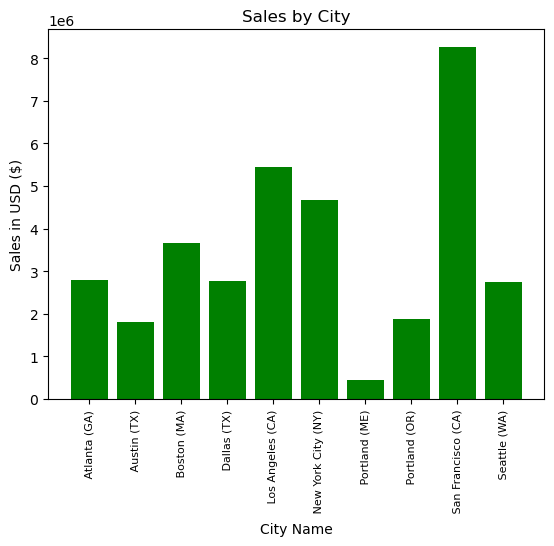

In [21]:
# ploting bar plot
#cities = [city for city, df in all_data.groupby("City")]

cities = results.index.tolist()

plt.bar(cities, results, color="g")
plt.xticks(cities, rotation="vertical", size=8)
plt.xlabel("City Name")
plt.ylabel("Sales in USD ($)")
plt.title("Sales by City")
plt.show()


#### Question 3: What time should we display advertisement to maximize likelyhood of customers buying product?

In [22]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)


In [23]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
Sales               float64
City                 object
dtype: object

In [37]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"], format="%m/%d/%y %H:%M")

In [ ]:
all_data.dtypes

In [ ]:
# adding Hour column
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data.head()

In [ ]:
# Grouping the data by "Hour" and counting the occurrences
results = all_data.groupby(["Hour"]).count()

# Creating a list of hours
#hours = results.index.tolist()

hours = [hour for hour, df in all_data.groupby("Hour")]


# Plotting the data
plt.plot(hours, results["Order ID"])
plt.xticks(hours)  # Make sure this is 'hours' and not 'hour'
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.title('Count per Hour')
plt.show()

#### Question.4. What Products are most often sold together?

In [ ]:
all_data.head()

In [ ]:
df = all_data[all_data["Order ID"].duplicated(keep=False)]
all_data.head(20)

In [ ]:
df["Grouped"] = df.groupby(["Order ID"])["Product"].transform(lambda x: ",".join(x))
df = df[["Order ID", "Grouped"]].drop_duplicates()
df.head()

In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)


#### Question.6. What product sold? why do you think it sold the most?

In [ ]:
all_data.head()

In [ ]:
results = all_data.groupby(["Product"]).sum()["Quantity Ordered"]
results

In [ ]:
#plotting a bar plot

products = results.index.tolist()

plt.bar(products, results, color="chocolate")
plt.xticks(products, rotation = "vertical", size=9)
plt.xlabel("Products Name")
plt.ylabel("Quantity Sold USD ($)")
plt.title("Product and Quantity Sold")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_3260\3947090800.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation="vertical", size=9)


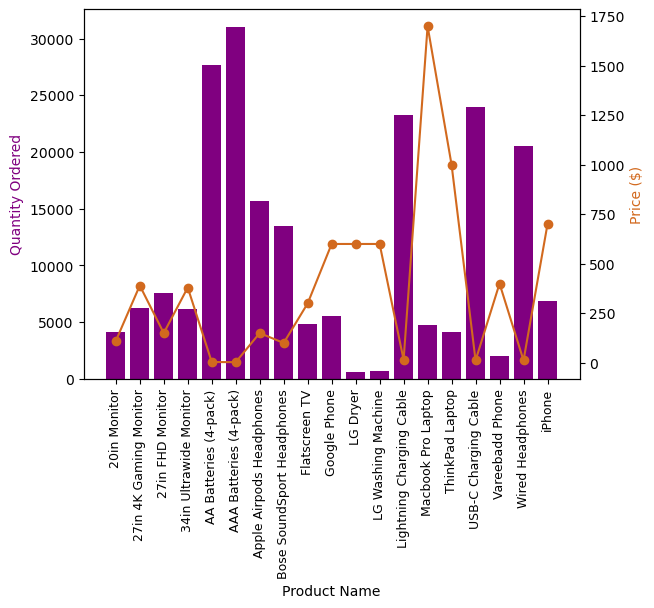

In [41]:
# Assuming `all_data` is your DataFrame
# Grouping the data by "Product" and calculating the mean price for each product
prices = all_data.groupby("Product")["Price Each"].mean()

# Assuming `results` contains the quantity ordered for each product
results = all_data.groupby("Product")["Quantity Ordered"].sum()
products = results.index.tolist()

# Create figure and axis objects
fig, ax1 = plt.subplots()

# Create a second y-axis
ax2 = ax1.twinx()

# Plot bar chart for quantities ordered
ax1.bar(products, results, color="purple")

# Plot line chart for mean prices
ax2.plot(products, prices, "chocolate", marker="o")

# Setting the labels
ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered", color="purple")
ax2.set_ylabel("Price ($)", color="chocolate")

# Rotate x-axis labels for better readability
ax1.set_xticklabels(products, rotation="vertical", size=9)

# Display the plot
plt.show()
